## Задание
1. Исследуйте, как объем обучающей выборки и количество тестовых данных, влияет на
точность классификации в датасетах про крестики-нолики (tic_tac_toe.txt) и о спаме e-mail
сообщений (spam.csv) с помощью наивного Байесовского классификатора. Постройте
графики зависимостей точности на обучающей и тестовой выборках в зависимости от их
соотношения.

In [2]:
import sklearn
from csv import reader
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# loading csv file into dataframe
file_spam = 'spam.csv'
sp_ds = pd.read_csv(file_spam)

type_map = {'nonspam': 0, 'spam': 1}
sp_ds['type'] = sp_ds['type'].map(type_map)

x_spam = sp_ds.drop('type', axis=1)
y_spam = sp_ds.type

In [4]:
# load txt file into dataframe
file_ttt = 'tic_tac_toe.txt'
ttt_ds = pd.read_csv(file_ttt, header=None)

# change results to 0 and 1
result_map = {'positive': 1, 'negative': 0}
ttt_ds[9] = ttt_ds[9].map(result_map)

# change feartures to numerical
t_map = {'x': 1, 'o': 2, 'b': 3}
for i in range(9):
    ttt_ds[i] = ttt_ds[i].map(t_map)


x_ttt = ttt_ds.drop(9, axis=1)
y_ttt = ttt_ds[9]

In [6]:
spam_scores = [0]*9
ttt_scores = [0]*9
spam_scores_tr = [0]*9
ttt_scores_tr = [0]*9
train_size = [i/10 for i in range(1, 10)]

times = 100
for i in range(times):
    for tr in train_size:
        # split data
        x_s_train, x_s_test, y_s_train, y_s_test = train_test_split(x_spam, y_spam, train_size=tr)
        x_ttt_train, x_ttt_test, y_ttt_train, y_ttt_test = train_test_split(x_ttt, y_ttt, train_size=tr)
        
        # init Gaussian Naive Bayes
        nb_spam = GaussianNB()
        nb_t = GaussianNB()
        
        nb_spam.fit(x_s_train, y_s_train)
        nb_t.fit(x_ttt_train, y_ttt_train)

        sp_score = nb_spam.score(x_s_test, y_s_test)
        t_score = nb_t.score(x_ttt_test, y_ttt_test)
        sp_score_tr = nb_spam.score(x_s_train, y_s_train)
        t_score_tr = nb_t.score(x_ttt_train, y_ttt_train)
        
        spam_scores_tr[int(tr*10 - 1)] += sp_score_tr / times
        ttt_scores_tr[int(tr*10 - 1)] += t_score_tr / times
        spam_scores[int(tr*10 - 1)] += sp_score / times
        ttt_scores[int(tr*10 - 1)] += t_score / times

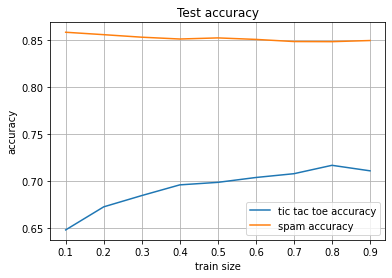

In [8]:
plt.plot(ttt_scores, label="tic tac toe accuracy")
plt.plot(spam_scores, label="spam accuracy")
plt.xticks(range(9), train_size)
plt.title('Test accuracy')
plt.xlabel('train size')
plt.ylabel('accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.show()

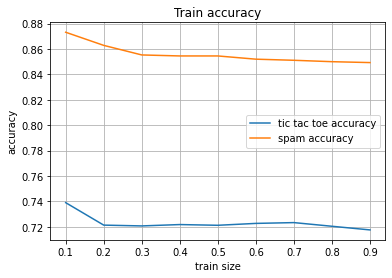

In [9]:
plt.plot(ttt_scores_tr, label="tic tac toe accuracy")
plt.plot(spam_scores_tr, label="spam accuracy")
plt.xticks(range(9), train_size)
plt.title('Train accuracy')
plt.xlabel('train size')
plt.ylabel('accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.show()